### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

### Importing Training Set

In [2]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = training_set.iloc[:,1:2].values #Getting open stock prices

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler()

In [7]:
training_set = sc.fit_transform(training_set)

### Getting Inputs & Outputs

In [8]:
training_set.shape

(1258, 1)

In [9]:
X_train = training_set[0:1257]  #Stock Price at time T

In [10]:
y_train = training_set[1:1258]  #Prediction for Stock Price at time T+1

### Reshaping X_train to include timestamp alongwith no of observations & no of features

In [11]:
X_train.shape

(1257, 1)

In [12]:
X_train = np.reshape(X_train,(1257,1,1)) #Second Dimension is Timestamp = 1

In [13]:
X_train.shape

(1257, 1, 1)

## Building RNN

### Importing Libraries

In [14]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [15]:
regressor = Sequential()

#### Adding the Input Layer & the LSTM Layer

In [16]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1))) #None referes to the timestamp, shows that model can accept any timestamp can also be specified as 1 since our model uses 1 timestamp

#### Adding the Output Layer

In [17]:
regressor.add(Dense(units=1))

#### Compiling RNN

In [18]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

#### Fitting RNN

In [19]:
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 1s 693us/step - loss: 0.8800
Epoch 2/200
1257/1257 [==============================] - 0s 90us/step - loss: 0.7226
Epoch 3/200
1257/1257 [==============================] - 0s 93us/step - loss: 0.5939
Epoch 4/200
1257/1257 [==============================] - 0s 91us/step - loss: 0.4873
Epoch 5/200
1257/1257 [==============================] - 0s 90us/step - loss: 0.3997
Epoch 6/200
1257/1257 [==============================] - 0s 90us/step - loss: 0.3271
Epoch 7/200
1257/1257 [==============================] - 0s 92us/step - loss: 0.2672
Epoch 8/200
1257/1257 [==============================] - 0s 89us/step - loss: 0.2191
Epoch 9/200
1257/1257 [==============================] - 0s 90us/step - loss: 0.1805
Epoch 10/200
1257/1257 [==============================] - 0s 88us/step - loss: 0.1500
Epoch 11/200
1257/1257 [==============================] - 0s 90us/step - loss: 0.1261
Epoch 12/200
1257/1257 [==============================] - 0s 9

1257/1257 [==============================] - 0s 110us/step - loss: 7.4641e-04
Epoch 97/200
1257/1257 [==============================] - 0s 86us/step - loss: 6.6493e-04
Epoch 98/200
1257/1257 [==============================] - 0s 101us/step - loss: 5.9565e-04
Epoch 99/200
1257/1257 [==============================] - 0s 107us/step - loss: 5.3812e-04
Epoch 100/200
1257/1257 [==============================] - 0s 106us/step - loss: 4.8814e-04
Epoch 101/200
1257/1257 [==============================] - 0s 103us/step - loss: 4.4730e-04
Epoch 102/200
1257/1257 [==============================] - 0s 102us/step - loss: 4.1309e-04
Epoch 103/200
1257/1257 [==============================] - 0s 90us/step - loss: 3.8503e-04
Epoch 104/200
1257/1257 [==============================] - 0s 91us/step - loss: 3.6288e-04
Epoch 105/200
1257/1257 [==============================] - 0s 88us/step - loss: 3.4387e-04
Epoch 106/200
1257/1257 [==============================] - 0s 98us/step - loss: 3.2807e-04
Epoch 107/

1257/1257 [==============================] - 0s 115us/step - loss: 2.5338e-04
Epoch 186/200
1257/1257 [==============================] - 0s 106us/step - loss: 2.5285e-04
Epoch 187/200
1257/1257 [==============================] - 0s 91us/step - loss: 2.5112e-04
Epoch 188/200
1257/1257 [==============================] - 0s 88us/step - loss: 2.5257e-04
Epoch 189/200
1257/1257 [==============================] - 0s 85us/step - loss: 2.5180e-04
Epoch 190/200
1257/1257 [==============================] - 0s 88us/step - loss: 2.5052e-04
Epoch 191/200
1257/1257 [==============================] - 0s 91us/step - loss: 2.5183e-04
Epoch 192/200
1257/1257 [==============================] - 0s 110us/step - loss: 2.5031e-04
Epoch 193/200
1257/1257 [==============================] - 0s 100us/step - loss: 2.5173e-04
Epoch 194/200
1257/1257 [==============================] - 0s 112us/step - loss: 2.5141e-04
Epoch 195/200
1257/1257 [==============================] - 0s 120us/step - loss: 2.5164e-04
Epoch 1

### Making Predictions

### Importing Test Set

In [20]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')

In [21]:
test_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [22]:
real_stock_price = test_set.iloc[:,1:2].values

In [23]:
inputs = real_stock_price

#### Scaling Test Data

In [24]:
inputs = sc.transform(inputs)

In [25]:
inputs.shape

(20, 1)

#### Reshaping Test Data

In [26]:
inputs = np.reshape(inputs,(20,1,1))

#### Prediction

In [27]:
predicted_stock_price = regressor.predict(inputs)

In [28]:
predicted_stock_price

array([[ 0.92572939],
       [ 0.94204855],
       [ 0.93815601],
       [ 0.95381546],
       [ 0.96747911],
       [ 0.96874464],
       [ 0.96626461],
       [ 0.96812069],
       [ 0.96841538],
       [ 0.96806872],
       [ 0.96696746],
       [ 0.96636879],
       [ 0.96792138],
       [ 0.96821606],
       [ 0.98119867],
       [ 0.98747003],
       [ 0.99445474],
       [ 0.99181497],
       [ 0.9746232 ],
       [ 0.95654106]], dtype=float32)

In [29]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price) #Bringing to the same scale as original data

#### Visualising Results

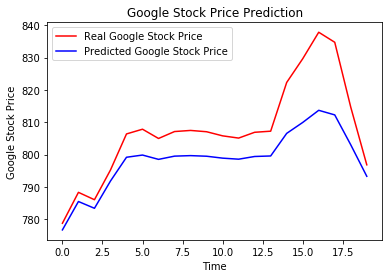

In [30]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#### Evaluating the RNN 

In [31]:
import math
from sklearn.metrics import mean_squared_error

In [32]:
rmse = math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

In [33]:
rmse

11.032800780219805

In [34]:
np.average(real_stock_price)

807.52600000000007

In [37]:
error_percentage = (rmse/807)*100

In [38]:
error_percentage

1.3671376431499138